# Convert nifti images to gif 

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import numpy as np
import skimage
import matplotlib.animation as animation

#for inline visualization in jupyter notebook
%matplotlib inline 

In [2]:
img = nib.load('/home/safal/flare/datasets/FLARE2022/Training/FLARE22_LabeledCase50/images/FLARE22_Tr_0001_0000.nii.gz')

In [3]:
img.header

In [4]:
img_arr = img.get_fdata()

In [58]:
resized_img = skimage.transform.resize(img_arr, (256, 256, 256), mode='edge')

In [117]:
images_3d = []
def show_slices(img):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(len(img.shape), 1, figsize=(3, 9), dpi=100)
    for i in range(img.shape[0]):
        plt_0 = axes[0].imshow(np.rot90(img[i, :, :]), cmap="gray", animated=True, aspect='equal', interpolation='nearest')
        axes[0].axis('off')
        plt_1 = axes[1].imshow(np.rot90(img[:, i, :]), cmap="gray", animated=True, aspect='equal', interpolation='nearest')
        axes[1].axis('off')
        plt_2 = axes[2].imshow(np.rot90(img[:, :, i]), cmap="gray", animated=True, aspect='equal', interpolation='nearest')
        axes[2].axis('off')

        images_3d.append([plt_0, plt_1, plt_2])
    return fig

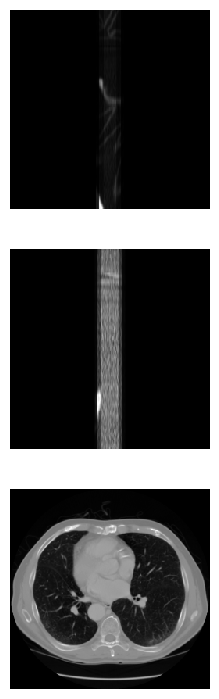

In [118]:
fig = show_slices(resized_img)
fig.set_dpi(100)

In [119]:

fig.subplots_adjust(bottom=0, top=1, left=0, right=1)

In [120]:
anim = animation.ArtistAnimation(fig, images_3d)
anim.save("filename.gif", fps=12, writer="pillow")